In [1]:
import numpy as np
import pandas as pd

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('gapping/train.csv', sep = '\t')
dev = pd.read_csv('gapping/dev.csv', sep = '\t')

<b>Количество примеров в train'е и dev'е</b>

In [3]:
train.shape

(16406, 8)

In [4]:
dev.shape

(4142, 8)

<b>Проверка, что распределения train'а и dev'а совпадают</b>

In [5]:
train['class'].value_counts()

0    10864
1     5542
Name: class, dtype: int64

In [6]:
dev['class'].value_counts()

0    2760
1    1382
Name: class, dtype: int64

In [7]:
train['class'].value_counts()[0] / train['class'].value_counts().sum()

0.6621967572839205

In [8]:
dev['class'].value_counts()[0] / dev['class'].value_counts().sum()

0.6663447609850314

<b>Сравниваем длины текстов в train'е и dev'е: видно, что разбиение честное</b>

In [9]:
train['lenc'] = train['text'].apply(len)
dev['lenc'] = dev['text'].apply(len)
train['lenw'] = train['text'].apply(lambda x: len(x.split(' ')))
dev['lenw'] = dev['text'].apply(lambda x: len(x.split(' ')))

In [10]:
train['lenc'].describe()

count    16406.000000
mean       151.015482
std        102.031582
min         12.000000
25%         84.000000
50%        128.000000
75%        189.000000
max       1138.000000
Name: lenc, dtype: float64

In [11]:
dev['lenc'].describe()

count    4142.000000
mean      152.647030
std       103.435783
min        10.000000
25%        85.000000
50%       130.000000
75%       190.000000
max      1008.000000
Name: lenc, dtype: float64

In [12]:
train['lenw'].describe()

count    16406.000000
mean        21.150067
std         12.905288
min          1.000000
25%         13.000000
50%         18.000000
75%         26.000000
max        146.000000
Name: lenw, dtype: float64

In [13]:
dev['lenw'].describe()

count    4142.000000
mean       21.241912
std        12.964626
min         2.000000
25%        13.000000
50%        18.000000
75%        26.000000
max       149.000000
Name: lenw, dtype: float64

In [14]:
train[train['lenw'] < 3]['class'].value_counts()

0    3
Name: class, dtype: int64

In [15]:
train_len_pos = []

for i in range(3, 50):
    vs = train[train['lenw'] == i]['class'].value_counts()
    train_len_pos.append(1 - (vs[0] / vs.sum()))

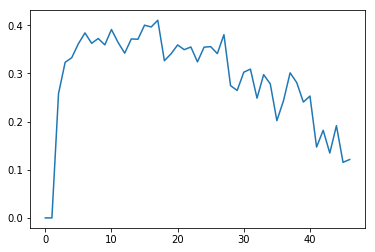

In [16]:
plt.plot(train_len_pos)

In [17]:
dev_len_pos = []

for i in range(3, 50):
    vs = dev[dev['lenw'] == i]['class'].value_counts()
    dev_len_pos.append(1 - (vs[0] / vs.sum()))

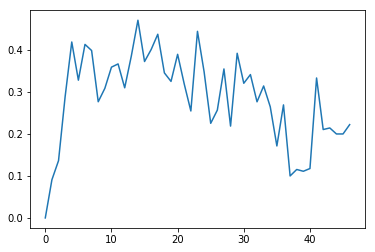

In [18]:
plt.plot(dev_len_pos)

/home/vladimir/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


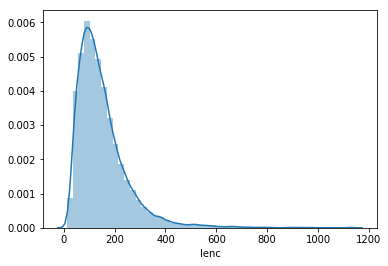

In [19]:
sns.distplot(train['lenc']);

/home/vladimir/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


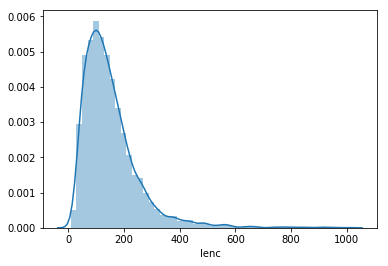

In [20]:
sns.distplot(dev['lenc']);

/home/vladimir/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


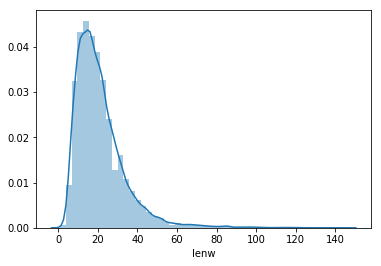

In [21]:
sns.distplot(train['lenw']);

/home/vladimir/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


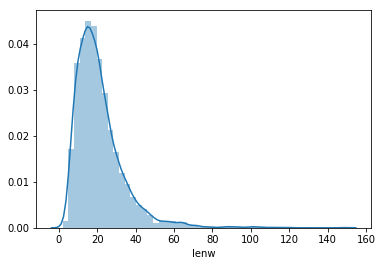

In [22]:
sns.distplot(dev['lenw']);

In [23]:
train.iloc[1]

text     Работа с двухбайтовыми наборами символов — про...
class                                                    1
cV                                                   92:99
cR1                                                  83:91
cR2                                                103:109
V                                                  127:127
R1                                                 119:124
R2                                                 127:134
lenc                                                   135
lenw                                                    23
Name: 1, dtype: object

In [24]:
# идеи: посмотреть, как "дела" с тире: какая точность при наличии тире
# посмотреть, есть ли baselines; если нет, написать организаторам по поводу baselin'ов
# можно ли решать только часть задач: можно ли обнаруживать только глагол; не привязывать аргументы
pd.set_option('max_colwidth', 1000)

In [25]:
train[train['class'] == 1].sample(50)

text  \
11014                                                                                                                                                                                                                                                                                  России удалось удачно увязать проблему Грузии с проблемой непризнанных республик, а проблему Украины - с еще только предстоящим там референдумом по данному вопросу, исход которого не ясен.   
1412                                                                                                                                                                                                                                                                                                                                                                                                                                            Ей нужна была семья, мне — свобода.   
16344                                                                                                                                                                                                                                                                                                                                                                                      Десятки женятся на десятках, восьмерки - на восьмерках, пятерки на пятерках и так далее.   
11068                                                                                                                                                                                                                                                                                         В школе дети проводят 30 часов в неделю, плюс около 8 часов уходит на подготовку к школе и дорогу туда и обратно, около 7 часов – на домашние задания, всего это составляет 45 часов.   
857                                                                                                                                                                                                                                                                                                                                                                                                                   Женщины относятся к живородящим, а мужчины - к яйценесущим...   
5390                                                                                                                                                                                                                                                                                                                                                                                                                    Залы должны открыться для митингов, а церкви для протестов.   
5434                                                                                                                                                                                                                                                                                                                                                                                                Фунт стерлингов вы получите за показания, и еще один – за разговор с Билкнэпом.   
12184                                                                                                                                                                                              Отправился в Дан-Лэри, пристроился на стене в конце пирса и до темноты смотрел, как местные парочки с довольным видом совершают свой обычный моцион, пока ветер с моря не начал продувать меня насквозь, а ходивший по берегу патрульный — подозрительно коситься в мою сторону.   
12424                                                                                                                                                                                                                           

In [26]:
train.sample(50)

text  \
8932                                                                                                                                                                                                                                                                                                               с 1 июля 2007 года повышает базовую часть пенсии на 250 крон и народную пенсию – на 150 крон;   
1175                                                                                                                                  Генеральная Ассамблея также постановила, что предыдущая система окладов, в соответствии с которой оклады судей, работающих в Гааге, выплачиваются в евро по минимальному обменному курсу, будет по-прежнему применяться к судьям, уже выполняющим свои обязанности в Гааге   
8719                                                                                                                                                                                                                                                                                                                                Во время выдоха сядьте на пятки; опустите туловище на бедра, а лоб — на пол.   
8903                                                                                                                                                                                                                                                                                                                                                            Ум говорит одно, а Душа и Сердце, совсем другое.   
16123                                                                                                                                                                                                                                                                                                      На здравоохранение было выделено на 60 процентов больше средств, а на новое жилье – на 400 процентов.   
1770                                                                                                                                                                                                                                                                 Утопающий, чтобы спасатель мог подтянуть его к судну, должен взяться за петлю руками, а в идеальном варианте — продеть петлю себе подмышки.   
2018                                                                                                                                                                                                                                                                                               Участникам пробега предстоит увидеть Мериду и Кампече, Ушмаль и Чичен-Ицу, а финиш ралли состоится в Канкуне.   
14072                                                                                                                                                                                                                                                                                                                                            Потом капельки превратились в настоящий душ, а душ - в водопад.   
4610                                                                                                                                                                                            Как пояснили в компании, увеличение добычи стало возможным за счет осуществления геолого-технических мероприятий, в т. ч. гидравлических разрывов пласта, обработки призабойных зон и оптимизации работы скважин   
3142                                                                                                                                                          Продажи систем интеграции бизнеса осуществляются через торговые представительства компании в Алматы (Казахстан) и Минске (Белоруссия), а ИТ- дистрибуция - через офисы, расположенные в Западной, Вост

<b>Посчитаем количество слов в train'е, чтобы проверить, оправдан ли подход "замены слова"</b>

In [27]:
def symb_cv(row):
    if row['class'] == 0:
        return '-1'
    tmp = row['cV']
    lst = row['cV'].split(':')
    start = int(lst[0])
    end = int(lst[1])
    return row['text'][start:end]

In [28]:
train[train['class'] == 1].apply(symb_cv, axis = 1).apply(lambda x: len(x.split(' '))).value_counts()

1    5524
2      18
dtype: int64

<b>Посмотрим подробнее: оказывается, что это - ошибки разметки; только 2 примера - действительно гэппинг с двумя словами (следуют в)</b>

In [29]:
train[train['class'] == 1][train[train['class'] == 1].apply(symb_cv, axis = 1).apply(lambda x: len(x.split(' '))) == 2]

text  \
1237                                                                                                                                     Учитель, я хочу путешествовать. Но одна часть меня хочет отправиться на запад, а другая на восток. Как мне быть?   
2297                                                                                                                                Бог становится просто чит-кодом, позволяющим мне прожить жизнь с минимальными потерями, храм — лишь местом продажи...   
4778                                                                                                                                                                                                Планы на год составляй весной, планы на день — утром.   
5273                                                                                                                                                                                  Люди будут дороже чистого золота, и мужи — дороже золота Офирского.   
5345   Еще один немаловажный момент: за счет уменьшения преподавательской нагрузки (600 часов в год вместо 720-900) предполагается, что студенты больше времени будут уделять самостоятельной работе, а преподаватели — научной деятельности и развитию.    
6301            На двух пограничных пунктах пропуска - Донецк" и "Матвеев Курган" в установленном порядке завершено таможенное оформление грузов, все автомобили пересекли границу. Часть из них следует в Донецк, другая - в Луганск", - сказал Воронов.   
7961          На двух пограничных пунктах пропуска — Донецк" и "Матвеев Курган" — в установленном порядке завершено таможенное оформление грузов, все автомобили пересекли границу. Часть из них следует в Донецк, другая — в Луганск", — сказал Воронов.   
8400                                                                                                                                                                                                                          Вы идите в жопу, а я домой.   
9672                                                                                                                                                                                                       Христос стучится в сердце, а диавол — в мозги.   
10115                                                                                                                                                             Порошенко своим указом наградил орденами Немцова посмертно, и Дурицкую - предсмертно...   
10398                                    При рождении у Ивана Третьего сына, Ивана Четвертого, было сделано предсказание, что он станет царем - мучителем. Иван Четвертый Грозный станет первым русским царем, а великое княжество Московское - царством.   
11680                                                                    Замечательно, что один из нас имеет белые, один черные и один рыжие волосы, но ни у одного из на нет волос того цвета, на который указывает его фамилия, - заметил черноволосый.   
13047                                                                                                                                                                                  Путь прямодушных приведет ко спасению, а путь лукавых к погибели .   
13747                                                                                                                                                       Я хочу чтобы моя страна любила нас так же сильно как и мы ее, вот чего я хочу (с) Джон Рэмбо.   
13787                                                                                                                                                                         Сотни немощей прощай всякому человеку, тысячу — отцу своему и матери своей.   
14008                                                                                                                            Жизнь наша, при взгляде на нее в самом начале, кажется бесконечной, 

In [30]:
train[train['class'] == 1][train[train['class'] == 1].apply(symb_cv, axis = 1).apply(lambda x: len(x.split(' '))) == 2].apply(symb_cv, axis = 1)

1237          очет 
2297     тановится 
4778      оставляй 
5273          удут 
5345        делять 
6301        едует в
7961        едует в
8400          дите 
9672       тучится 
10115      аградил 
10398        танет 
11680         меет 
13047      риведет 
13747        юбила 
13787        рощай 
14008       ажется 
14952        ивешь 
16321         меет 
dtype: object

<b>Видна структура ошибок разметки. Часть разметок сместилась на одну позицию (вправо).

Исправить ошибки в разметке? Скорее всего, сообщить о них организаторам, ведь часть из ошибок наверняка попала и в тест.</b>

------------------------------------------------------------------------------------------------------------------------
<b>Посмотрим, по сколько раз в предложениях датасета опускается гэппинг</b>

In [31]:
train[train['class'] == 1]['V'].apply(lambda x: x.count(':')).value_counts()

1    5173
2     315
3      45
4       7
5       2
Name: V, dtype: int64

<b>Проверка гэппинга на части речи</b>

In [34]:
from nltk.tag import pos_tag

In [35]:
train['pos'] = train[train['class'] == 1].apply(symb_cv, axis = 1).apply(lambda x: pos_tag(x, lang = 'rus')[0][1])

In [36]:
train['pos'].value_counts()

PR              2240
S               1516
V                684
NONLEX           464
CONJ             209
S-PRO            150
PART             106
INIT=abbr         69
ADV=abbr          54
A=pl              39
ADV-PRO=abbr       5
A-PRO=n            3
INTJ               2
ADV                1
Name: pos, dtype: int64

In [37]:
train['Cv_word'] = train.apply(symb_cv, axis = 1)

In [43]:
train[train['pos'] == 'PR']['Cv_word']

1                  состоит
7              уменьшились
15              увеличился
38               ворвалась
42              составляют
43                увеличен
48               составила
57              откликнусь
64                 выросли
70              оставалось
74                 следует
90                    кося
91              составляет
97                  входят
100            выполняется
108      восстанавливаются
113                 возрос
117               составил
126              отводится
154            уменьшились
162            выполняется
169               выпущено
173                  вырос
174               казалась
176               составит
181        устанавливается
184             составляет
187                кайфует
203                следует
211            уменьшилось
               ...        
16226           становимся
16233          сократилось
16235            снизилась
16236               влияли
16243          вставляется
16252                ведёт
1

In [44]:
train[train['pos'] == 'S']['Cv_word']

5             превращает
8         ратифицирована
14               получим
20              превысил
22             принимают
30             поступило
36                 может
46                 может
82              говорить
95          прогнозируем
98              приделан
107                  шла
118             получила
124                может
137            проживают
142           посмотрела
143              мечтают
150               думают
168           привлекает
205              положив
228             загоняет
245                могла
255                можно
256               давите
259              продают
265             достигло
276                  шли
282           продолжали
290             придется
344          превратился
              ...       
16173         получались
16174              могут
16195          подключён
16216        применяется
16224             должны
16246           причинит
16263              может
16267             должна
16272           говорили
